<a href="https://colab.research.google.com/github/Maximiliano-Rodriguez-M/Aprendizaje-de-AI/blob/main/CNN/clasificacion_de_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

se cargan conjuntos de datos

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()


exploracion del dataset

In [ ]:
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

obtenemos las informacion del dataset

In [ ]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

visualizacion de la imagen

In [ ]:
index = 3


magen del dígito y su etiqueta

In [ ]:
image = digits.images[index]
label = digits.target[index]


representacion de la imagen en una matris

In [ ]:
print(image)


[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


se muestra la imagen

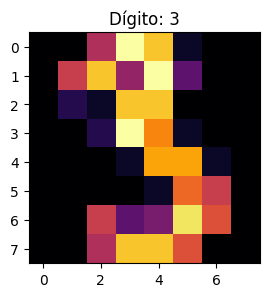

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
#cmap=plt.cm.color en ingles
plt.imshow(image, cmap=plt.cm.inferno)
plt.title(f'Dígito: {label}')
plt.show()


dividimos los datos en conjuntos

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


longitud del conjunto

In [ ]:
print(X_train.shape)
print(X_test.shape)


(1437, 64)
(360, 64)


se nota el primer elemento de la variable

In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)


tf.Tensor(
[[ 0.         -0.34169755 -0.46336049  0.50836462 -2.54590607 -1.03722581
  -0.40623424 -0.13101874]
 [-0.06103492 -0.61725402  0.30881425  0.00348328 -2.18152552 -1.35608548
  -0.52465505 -0.13336005]
 [-0.04991522  0.12851911  1.08857992 -0.19343737 -1.16010978 -1.27307852
  -0.552537   -0.11409248]
 [-0.03733267  0.86365151  1.13744682 -1.16195968 -1.60835913 -1.28296188
  -0.62554872 -0.04573894]
 [ 0.          1.09151514  1.34318585 -1.12678131 -0.90106555 -1.13185292
  -0.81347241  0.        ]
 [-0.06519029  0.82828946  1.39981472 -0.82540858  0.69177178  1.17865528
  -0.33784246 -0.09403434]
 [-0.03963009  0.15955797  1.14244768  0.64507954 -1.42282149  0.68917912
   1.47990131 -0.21608405]
 [-0.02638899 -0.30677646 -0.49962244 -0.246272    0.84804385  1.05270303
   0.45952251 -0.19710003]], shape=(8, 8), dtype=float64)


Escalar las imágenes para normalizar los valores de píxeles

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

elementos de la variable X_train

In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [ ]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

In [ ]:
X_train[0]

<tf.Tensor: shape=(8, 8), dtype=float64, numpy=
array([[ 0.        , -0.34169755, -0.46336049,  0.50836462, -2.54590607,
        -1.03722581, -0.40623424, -0.13101874],
       [-0.06103492, -0.61725402,  0.30881425,  0.00348328, -2.18152552,
        -1.35608548, -0.52465505, -0.13336005],
       [-0.04991522,  0.12851911,  1.08857992, -0.19343737, -1.16010978,
        -1.27307852, -0.552537  , -0.11409248],
       [-0.03733267,  0.86365151,  1.13744682, -1.16195968, -1.60835913,
        -1.28296188, -0.62554872, -0.04573894],
       [ 0.        ,  1.09151514,  1.34318585, -1.12678131, -0.90106555,
        -1.13185292, -0.81347241,  0.        ],
       [-0.06519029,  0.82828946,  1.39981472, -0.82540858,  0.69177178,
         1.17865528, -0.33784246, -0.09403434],
       [-0.03963009,  0.15955797,  1.14244768,  0.64507954, -1.42282149,
         0.68917912,  1.47990131, -0.21608405],
       [-0.02638899, -0.30677646, -0.49962244, -0.246272  ,  0.84804385,
         1.05270303,  0.45952251

red neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


tasa de aprendizaje de 0.001

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

entrenamiento

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9792 - val_loss: 0.0960
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9757 - val_loss: 0.0955
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9792 - val_loss: 0.0958
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 9.5042e-04 - val_accuracy: 0.9792 - val_loss: 0.0965
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.6480e-04 - val_accuracy: 0.9792 - val_loss: 0.0974
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.3705e-04 - val_accuracy: 0.9792 - val_loss: 0.0971
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.3369e-04 - val_accuracy: 0.9826 - val_loss: 0.0958
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.3594e-04 - val_accuracy

grafica a funcion de la perdida

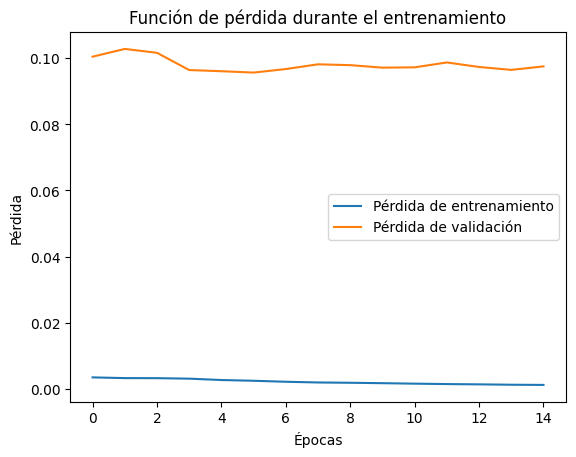

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


Evaluacion

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9849 - loss: 0.0255  
Loss: 0.03182688727974892, Accuracy: 0.9861111044883728


matriz confucion

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


visulacion de la matriz confucion

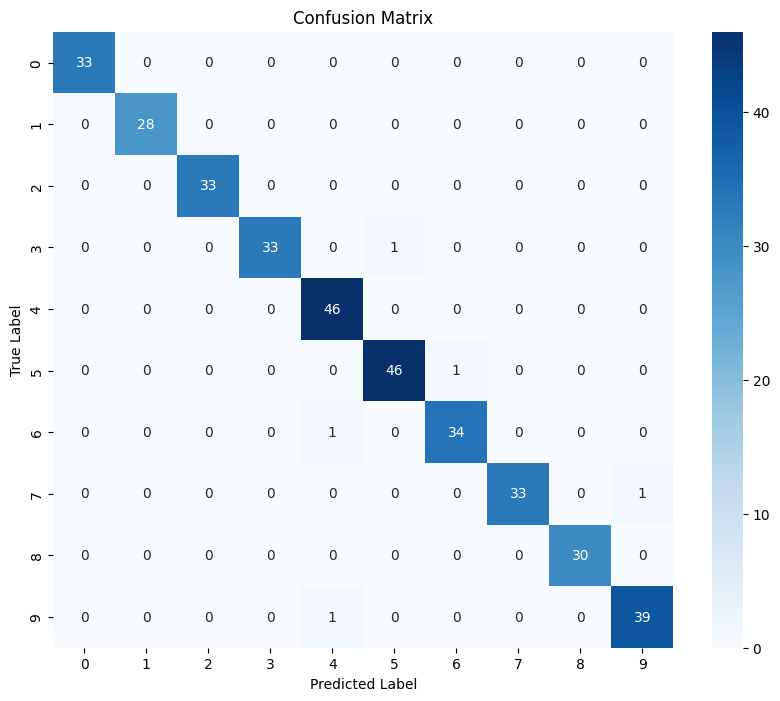

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 0.975


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

Bonus (Predecir una imagen distinta al conjunto de datos)

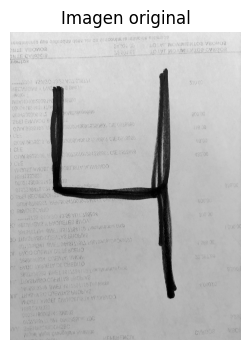

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/mi_numero.png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()


Redimensionar

Redimensionar la imagen a 8x8 pixeles, sin mantener la proporción

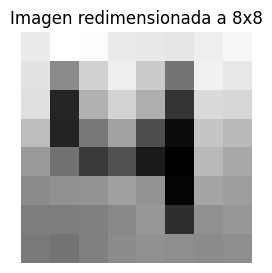

In [ ]:
import matplotlib.pyplot as plt

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")


imagen invertida

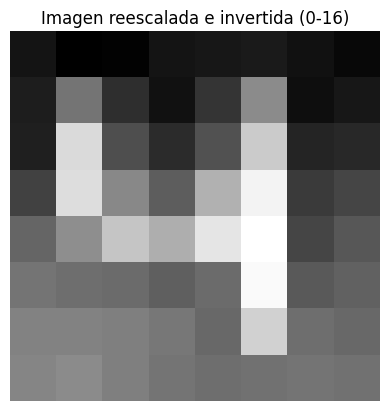

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

In [ ]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicción: 4


In [ ]:
img_tensor

array([[[-1.3132032 , -2.0818071 , -1.7881407 , -1.2689707 ,
         -1.4171813 , -2.0335789 , -1.2674499 , -1.6081523 ],
        [-1.1174462 , -0.2861784 , -1.0106883 , -1.3260031 ,
         -0.94674766, -0.537172  , -1.3460515 , -1.2159201 ],
        [-1.0521939 ,  1.2849966 , -0.4405565 , -0.8127116 ,
         -0.47631404,  0.30695546, -0.7172391 , -0.7452413 ],
        [-0.26916587,  1.329888  ,  0.5960468 ,  0.15683907,
          1.0761169 ,  0.8441271 , -0.16702828,  0.03922323],
        [ 0.51386213,  0.11783804,  1.6844811 ,  1.753746  ,
          1.9228975 ,  0.9976047 ,  0.1473779 ,  0.50990194],
        [ 0.8401238 , -0.3759598 ,  0.07774515,  0.21387146,
         -0.05292378,  0.92086595,  0.6975887 ,  0.8236878 ],
        [ 1.1663854 , -0.06172482,  0.4405563 ,  0.6701306 ,
         -0.09996714,  0.38369426,  1.2477995 ,  0.9805807 ],
        [ 1.2316378 ,  0.07294733,  0.4405563 ,  0.6130982 ,
         -0.00588042, -0.88249665,  1.4050026 ,  1.2159201 ]]],
      dtype=fl